In [1]:
# -*- encoding: utf-8 -*-
import pandas as pd
from tqdm import tqdm

if __name__ == '__main__':
    # 단어쌍의 빈도를 체크하기위해 리우올림픽 DTM을 불러온다.
    dataset = pd.read_csv('C:/Users/USER/Desktop/DTM_R.csv')

    # 단어들의 목록을 가져온다.
    # 이때 0번째 인덱스에는 빈 칸이 들어오므로 인덱싱을 통해 없애준다.
    column_list = dataset.columns[1:]
    word_length = len(column_list)

    # 각 단어쌍의 빈도수를 저장할 dictionary 생성
    count_dict = {}

    for doc_number in tqdm(range(len(dataset)), desc='단어쌍 만들기 진행중'):
        tmp = dataset.loc[doc_number]           # 현재 문서의 단어 출현 빈도 데이터를 가져온다.
        for i, word1 in enumerate(column_list):
            if tmp[word1]:              # 현재 문서에 첫번째 단어가 존재할 경우
                for j in range(i + 1, word_length):
                    if tmp[column_list[j]]:              # 현재 문서에 두번째 단어가 존재할 경우
                        count_dict[column_list[i], column_list[j]] = count_dict.get((column_list[i], column_list[j]), 0) + max(tmp[word1], tmp[column_list[j]])

    # count_list에 word1, word2, frequency 형태로 저장할 것이다.
    count_list = []

    for words in count_dict:
        count_list.append([words[0], words[1], count_dict[words]])

    # 단어쌍 동시 출현 빈도를 DataFrame 형식으로 만든다.
    df = pd.DataFrame(count_list, columns=["word1", "word2", "freq"])
    df = df.sort_values(by=['freq'], ascending=False)
    df = df.reset_index(drop=True)

    df.to_csv('C:/Users/USER/Desktop/Networkx_R.csv', encoding='utf-8-sig')

단어쌍 만들기 진행중: 100%|██████████████████████████████████████████████████████████| 301/301 [00:06<00:00, 44.26it/s]


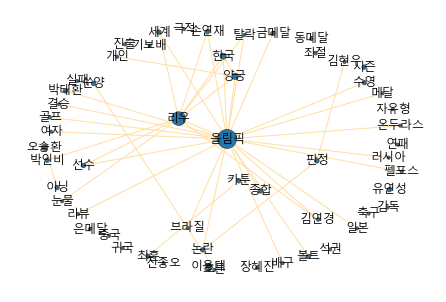

In [4]:
# -*- encoding: utf-8 -*-
import pandas as pd
import networkx as nx
import operator
import numpy as np

if __name__ == '__main__':
    # 단어쌍 동시출현 빈도수를 담았던 Networkx_R.csv파일을 불러온다.
    dataset = pd.read_csv('C:/Users/USER/Desktop/Networkx_R.csv')

    # 중심성 척도 계산을 위한 Graph를 만든다
    G_centrality = nx.Graph()

    # 빈도수가 4 이상인 단어쌍에 대해서만 edge(간선)을 표현한다.
    for ind in range((len(np.where(dataset['freq'] >= 4)[0]))):
        G_centrality.add_edge(dataset['word1'][ind], dataset['word2'][ind], weight=int(dataset['freq'][ind]))

    dgr = nx.degree_centrality(G_centrality)        # 연결 중심성
    btw = nx.betweenness_centrality(G_centrality)   # 매개 중심성
    cls = nx.closeness_centrality(G_centrality)     # 근접 중심성
    egv = nx.eigenvector_centrality(G_centrality)   # 고유벡터 중심성
    pgr = nx.pagerank(G_centrality)                 # 페이지 랭크

    # 중심성이 큰 순서대로 정렬한다.
    sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
    sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
    sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
    sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True)
    sorted_pgr = sorted(pgr.items(), key=operator.itemgetter(1), reverse=True)

    # 단어 네트워크를 그려줄 Graph 선언
    G = nx.Graph()

    # 페이지 랭크에 따라 두 노드 사이의 연관성을 결정한다. (단어쌍의 연관성)
    # 연결 중심성으로 계산한 척도에 따라 노드의 크기가 결정된다. (단어의 등장 빈도수)
    for i in range(len(sorted_pgr)):
        G.add_node(sorted_pgr[i][0], nodesize=sorted_dgr[i][1])

    for ind in range((len(np.where(dataset['freq'] > 4)[0]))):
        G.add_weighted_edges_from([(dataset['word1'][ind], dataset['word2'][ind], int(dataset['freq'][ind]))])

    # 노드 크기 조정
    sizes = [G.nodes[node]['nodesize'] * 500 for node in G]

    options = {
        'edge_color': '#FFDEA2',
        'width': 1,
        'with_labels': True,
        'font_weight': 'regular',
    }
    
    # 폰트 설정을 위한 font_manager import
    import matplotlib.font_manager as fm
    import matplotlib.pyplot as plt

  # 폰트 설정
    font_fname = 'C:/Windows/Fonts/malgun.ttf'
  # 여기서 폰트는 C:/Windows/Fonts를 참고해도 좋다.
    fontprop = fm.FontProperties(fname=font_fname, size=18).get_name()

    nx.draw(G, node_size=sizes, pos=nx.spring_layout(G, k=3.5, iterations=100), **options, font_family=fontprop)  # font_family로 폰트 등록
    ax = plt.gca()
    ax.collections[0].set_edgecolor("#555555")
    plt.show()

In [5]:
# -*- encoding: utf-8 -*-
import pandas as pd
from tqdm import tqdm

if __name__ == '__main__':
    # 단어쌍의 빈도를 체크하기위해 도쿄올림픽 DTM을 불러온다.
    dataset = pd.read_csv('C:/Users/USER/Desktop/DTM_D.csv')

    # 단어들의 목록을 가져온다.
    # 이때 0번째 인덱스에는 빈 칸이 들어오므로 인덱싱을 통해 없애준다.
    column_list = dataset.columns[1:]
    word_length = len(column_list)

    # 각 단어쌍의 빈도수를 저장할 dictionary 생성
    count_dict = {}

    for doc_number in tqdm(range(len(dataset)), desc='단어쌍 만들기 진행중'):
        tmp = dataset.loc[doc_number]           # 현재 문서의 단어 출현 빈도 데이터를 가져온다.
        for i, word1 in enumerate(column_list):
            if tmp[word1]:              # 현재 문서에 첫번째 단어가 존재할 경우
                for j in range(i + 1, word_length):
                    if tmp[column_list[j]]:              # 현재 문서에 두번째 단어가 존재할 경우
                        count_dict[column_list[i], column_list[j]] = count_dict.get((column_list[i], column_list[j]), 0) + max(tmp[word1], tmp[column_list[j]])

    # count_list에 word1, word2, frequency 형태로 저장할 것이다.
    count_list = []

    for words in count_dict:
        count_list.append([words[0], words[1], count_dict[words]])

    # 단어쌍 동시 출현 빈도를 DataFrame 형식으로 만든다.
    df = pd.DataFrame(count_list, columns=["word1", "word2", "freq"])
    df = df.sort_values(by=['freq'], ascending=False)
    df = df.reset_index(drop=True)

    df.to_csv('C:/Users/USER/Desktop/Networkx_D.csv', encoding='utf-8-sig')

단어쌍 만들기 진행중: 100%|██████████████████████████████████████████████████████████| 340/340 [00:11<00:00, 30.85it/s]


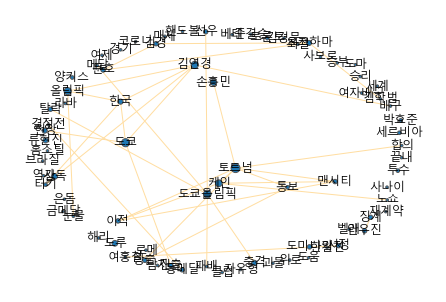

In [20]:
# -*- encoding: utf-8 -*-
import pandas as pd
import networkx as nx
import operator
import numpy as np

if __name__ == '__main__':
    # 단어쌍 동시출현 빈도수를 담았던 networkx.csv파일을 불러온다.
    dataset = pd.read_csv('C:/Users/USER/Desktop/Networkx_D.csv')

    # 중심성 척도 계산을 위한 Graph를 만든다
    G_centrality = nx.Graph()

    # 빈도수가 3 이상인 단어쌍에 대해서만 edge(간선)을 표현한다.
    for ind in range((len(np.where(dataset['freq'] >= 3)[0]))):
        G_centrality.add_edge(dataset['word1'][ind], dataset['word2'][ind], weight=int(dataset['freq'][ind]))

    dgr = nx.degree_centrality(G_centrality)        # 연결 중심성
    btw = nx.betweenness_centrality(G_centrality)   # 매개 중심성
    cls = nx.closeness_centrality(G_centrality)     # 근접 중심성
    #egv = nx.eigenvector_centrality(G_centrality)   # 고유벡터 중심성
    pgr = nx.pagerank(G_centrality)                 # 페이지 랭크

    # 중심성이 큰 순서대로 정렬한다.
    sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
    sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
    sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
    sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True)
    sorted_pgr = sorted(pgr.items(), key=operator.itemgetter(1), reverse=True)

    # 단어 네트워크를 그려줄 Graph 선언
    G = nx.Graph()

    # 페이지 랭크에 따라 두 노드 사이의 연관성을 결정한다. (단어쌍의 연관성)
    # 연결 중심성으로 계산한 척도에 따라 노드의 크기가 결정된다. (단어의 등장 빈도수)
    for i in range(len(sorted_pgr)):
        G.add_node(sorted_pgr[i][0], nodesize=sorted_dgr[i][1])

    for ind in range((len(np.where(dataset['freq'] > 3)[0]))):
        G.add_weighted_edges_from([(dataset['word1'][ind], dataset['word2'][ind], int(dataset['freq'][ind]))])

    # 노드 크기 조정
    sizes = [G.nodes[node]['nodesize'] * 500 for node in G]

    options = {
        'edge_color': '#FFDEA2',
        'width': 1,
        'with_labels': True,
        'font_weight': 'regular',
    }
    
    
    # 폰트 설정을 위한 font_manager import
    import matplotlib.font_manager as fm
    import matplotlib.pyplot as plt

  # 폰트 설정
    font_fname = 'C:/Windows/Fonts/malgun.ttf'
  # 여기서 폰트는 C:/Windows/Fonts를 참고해도 좋다.
    fontprop = fm.FontProperties(fname=font_fname, size=18).get_name()

    nx.draw(G, node_size=sizes, pos=nx.spring_layout(G, k=3.5, iterations=100), **options, font_family=fontprop)  # font_family로 폰트 등록
    ax = plt.gca()
    ax.collections[0].set_edgecolor("#555555")
    plt.show()